In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from rpi_weather_display.providers import owmWeather
from rpi_weather_display.plot import create_hourly, create_daily, create_current_weather
import rpi_weather_display


# Auto reload
%load_ext autoreload
%autoreload 2

In [76]:
forecast = owmWeather(lat=52.494117, long=13.422371, api_key=os.environ["OWM_API_KEY"])

## Current weather plot

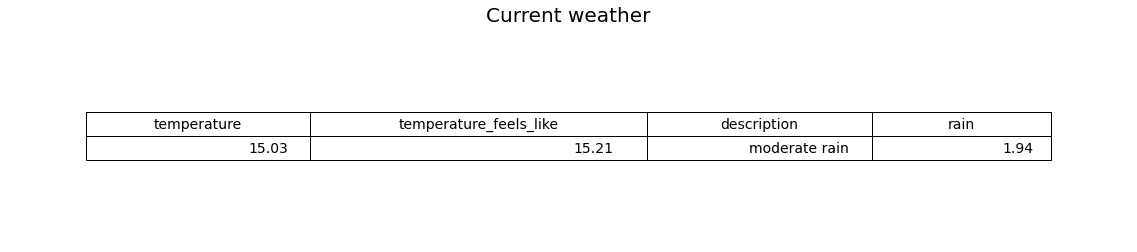

In [77]:
c_plot = create_current_weather(forecast.get_current_weather())

## Hourly plot

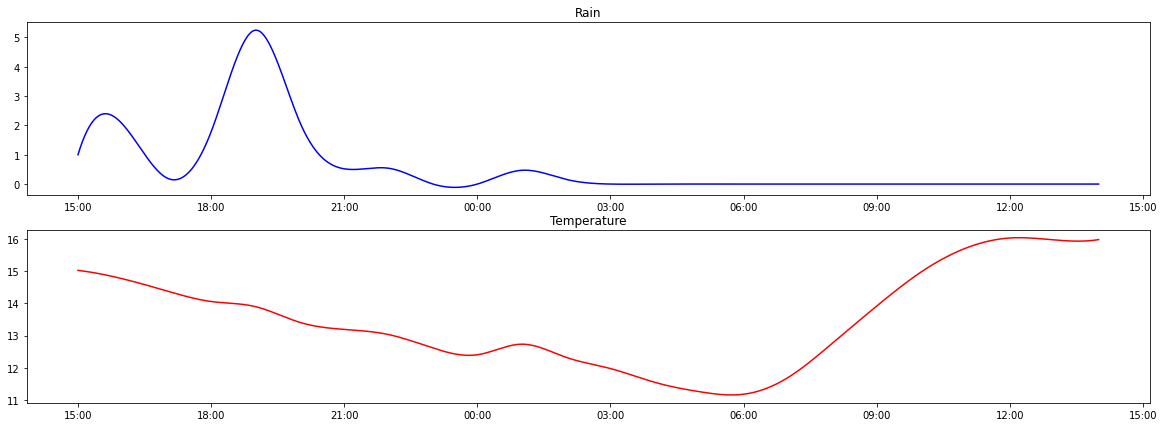

In [78]:
h_plot = create_hourly(forecast.get_hourly_data())

## Daily weather plot

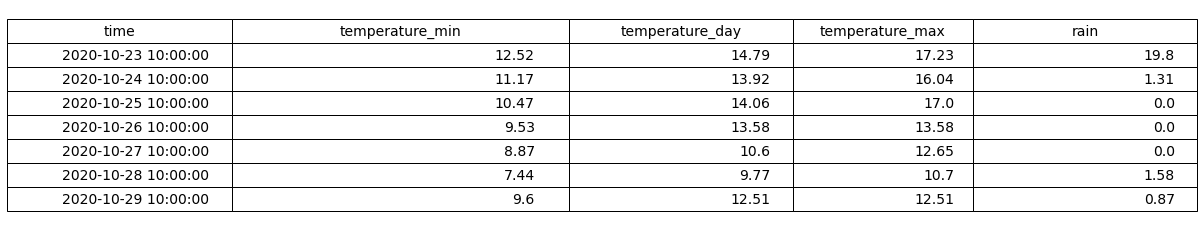

In [79]:
d_plot = create_daily(forecast.get_daily_data())

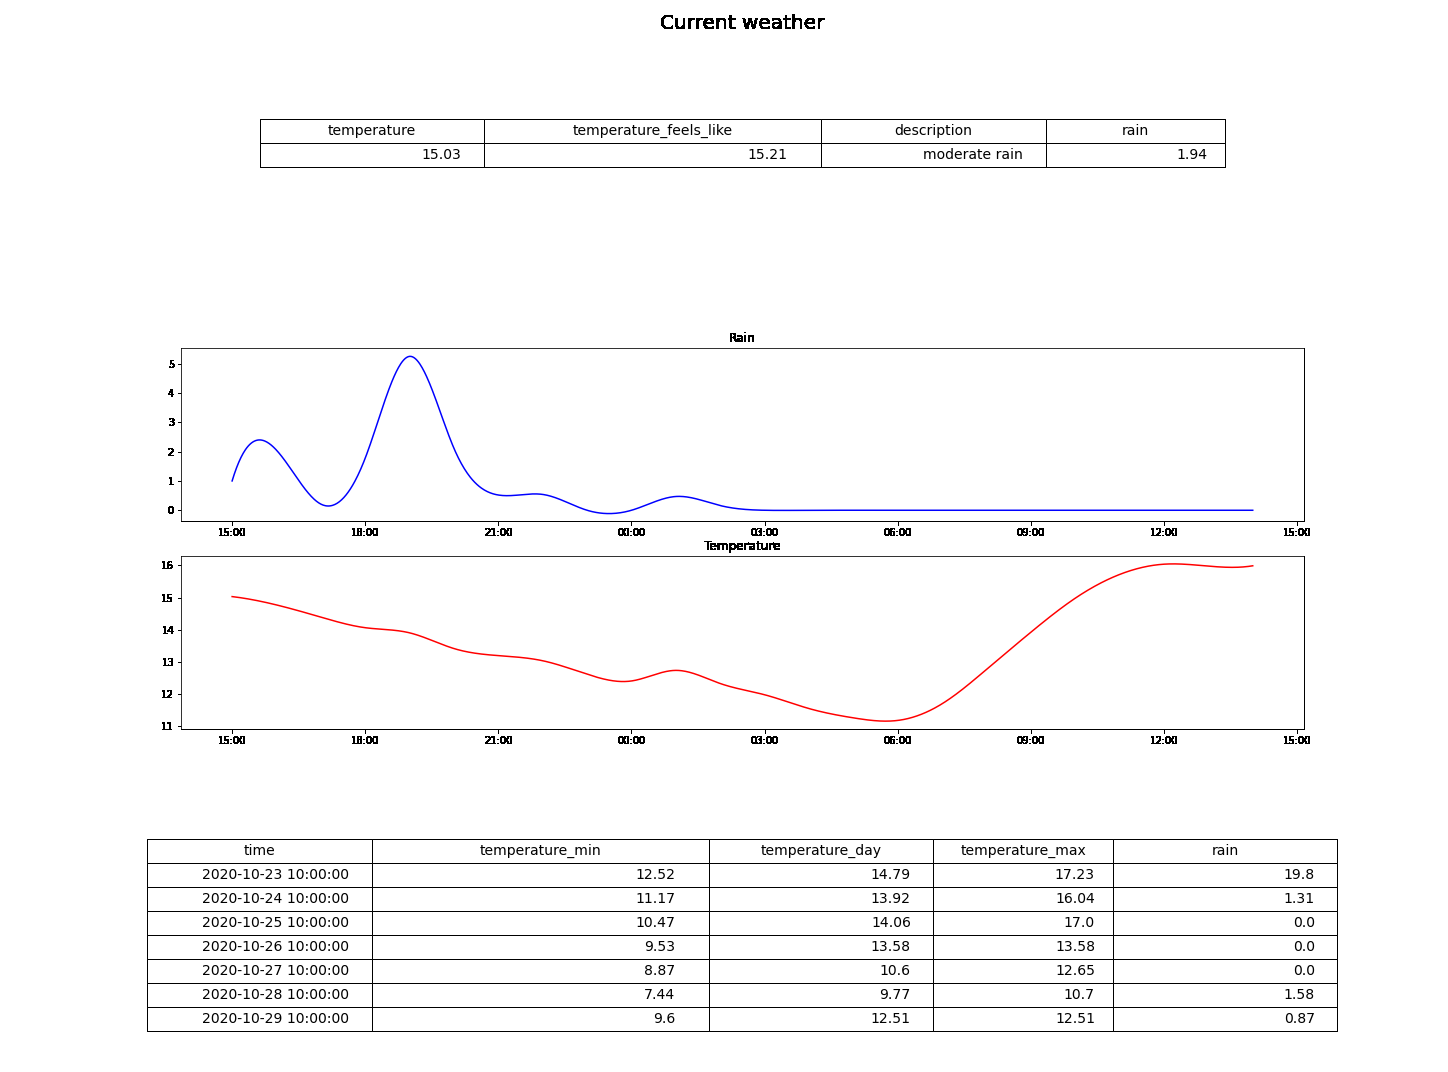

In [80]:
rpi_weather_display.create_display_image(
    current=rpi_weather_display.convert_plt_fig_to_pil(c_plot),
    hourly=rpi_weather_display.convert_plt_fig_to_pil(h_plot),
    daily=rpi_weather_display.convert_plt_fig_to_pil(d_plot)
)